# 数据分析
---
**本次数据数据集中的数据基本都是离散型变量，所有的变量只有*包装、香调、分类*三个变量有分析价值**
<br>
**分析以分类作为示例进行频数分析、集中度分析、离散度分析，相关度分析因离散型变量不作细致分析**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

# 加载数据集
path = r'C:\Users\11435\Desktop\京东香水.csv'
df = pd.read_csv(path)

# 查看数据集的前几行以了解数据结构
df.head()

,商品名称,产品毛重,商品产地,包装,香调,净含量,分类,性别,适用场所,价格,评价,Unnamed: 11
0,冰希黎6956008601463,10.00g,中国大陆上海,Q版香水,花果香调,1ml-15ml,浓香水EDP,女,日常，约会，情趣，商务，party聚会，旅行,9.9,1.9万+,NaN
1,冰希黎6956008601432,200.00g,中国大陆上海,Q版香水,混合香调,1ml-15ml,浓香水EDP,女,日常，约会，party聚会，运动，旅行,9.9,1.9万+,NaN
2,（免邮）上海老国货艾琳法国茉莉女士香水75ml EDP 持久淡香清新花香调,160.00g,NaN,独立装,花果香调,31ml-100ml,浓香水EDP,女,日常，约会，商务，party聚会，旅行,18,90+,NaN
3,法颂浪漫梦境女士香膏15g 持久淡香清新固体精油香水香体膏 女士持久淡香礼盒,15.00g,NaN,Q版香水,花果香调,1ml-15ml,固体香水/香膏,女,日常，约会，商务，party聚会，运动，旅行,22,30+,NaN
4,雅芳香水,30.00g,中国大陆,独立装,东方香调,1ml-15ml,淡香水EDT,女,日常，约会，商务，party聚会，运动，旅行,23.9,3.9万+,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   商品名称         1009 non-null   object
 1   产品毛重         1009 non-null   object
 2   商品产地         489 non-null    object
 3   包装           1007 non-null   object
 4   香调           1005 non-null   object
 5   净含量          1007 non-null   object
 6   分类           1008 non-null   object
 7   性别           1009 non-null   object
 8   适用场所         969 non-null    object
 9   价格           1009 non-null   object
 10  评价           1009 non-null   object
 11  Unnamed: 11  2 non-null      object
dtypes: object(12)
memory usage: 94.7+ KB


# 频数分析
---
**频数分析部分选择的变量为分类，对不同类别的数量进行统计分析**


In [3]:
# 数据的频数分析
print(df['分类'].value_counts())

分类
淡香水EDT        651
浓香水EDP        265
其它             60
发香雾            12
香体走珠            6
香精parfum        6
固体香水/香膏         3
淡香水EDT，古龙水      3
古龙水             2
Name: count, dtype: int64


# 集中度分析
---
**连续型变量的集中度分析主要看均值以及中位数，离散型变量则是众数**

In [4]:
# 数据的集中趋势分析
# print(df['分类'].mean())  # 平均值
# print(df['分类'].median())  # 中位数
print(df['分类'].mode())  # 众数

0    淡香水EDT
Name: 分类, dtype: object


# 离散度分析
---
**连续型数据离散度用std以及var来进行刻画，离散型数据则用类别数量来刻画**

In [5]:
# 数据离散程度分析
# print(df['分类'].std())  # 标准差
# print(df['分类'].var())  # 方差
print(f"类别数量 {df['分类'].nunique()}") # 类别数量

类别数量 9


# 数据分布
---
**连续型的数据分布通过盒状图进行刻画或者切割成离散型数据进行刻画，离散型数据直接用直方图刻画**

Text(0, 0.5, 'Frequency')

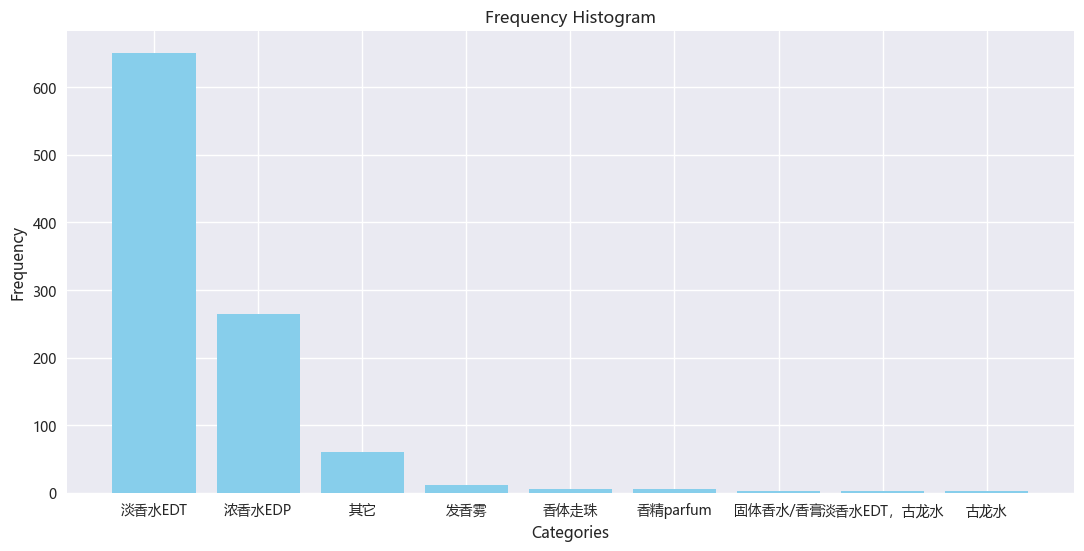

In [6]:
# 数据的分布
plt.rcParams['font.family'] = 'Microsoft YaHei'
freq_table = df['分类'].value_counts()
categories = list(freq_table.keys())
frequency = list(freq_table.values)
plt.figure(figsize=(13, 6))
plt.bar(categories, frequency, color='skyblue')
plt.title('Frequency Histogram')
plt.xlabel('Categories')
plt.ylabel('Frequency')

# 相关性分析
---
**连续型变量相关性分析直接通过协方差矩阵进行刻画，离散型变量则需要用卡方检验进行相关性分析**
<br>
**这里以分类和香调两个变量作为演示**

In [7]:
# 变量间的相关性分析
# print(df.corr()) # 连续型变量相关性分析

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['分类'], df['香调'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("变量相关性分析：")
print("卡方统计量:", chi2)
print("p 值:", p_value)

变量相关性分析：
卡方统计量: 393.6174482243526
p 值: 6.329428036096377e-49


# 管理意义
---
- **了解每种香水的受欢迎程度**
- **定位最热门的香水**
- **帮助了解不同香水类型和其香调或者是其他变量的相关性**

In [8]:
df['分类'].value_counts().keys


<bound method Series.keys of 分类
淡香水EDT        651
浓香水EDP        265
其它             60
发香雾            12
香体走珠            6
香精parfum        6
固体香水/香膏         3
淡香水EDT，古龙水      3
古龙水             2
Name: count, dtype: int64>